In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction as Frac

n_single = 225
n_double = 60
n_fraction = 225

In [3]:
def x_k(i, x_k_values, precision):
    if (i == 0):
        return x_k_values[0]
    elif (i == 1):
        return x_k_values[1]
    else:
        return precision(2.25)*x_k_values[i-1]-precision(0.5)*x_k_values[i-2]

def generate_n_elements(n, precision):
    x_k_values = np.zeros(n, dtype=precision)
    x_k_values[0] = precision(1/3)
    x_k_values[1] = precision(1/12)
    for i in range(2, n):
        x_k_values[i] = (x_k(i, x_k_values, precision))
    return x_k_values

def expected_values(n):
    expected_x_k_values = np.zeros(n)
    for i in range(n):
        expected_x_k_values[i] = (4**(-i))/3
    return expected_x_k_values

In [4]:
x_single = generate_n_elements(n_single, np.float32)
x_double = generate_n_elements(n_double, np.float64)
x_fractions = generate_n_elements(n_fraction, Frac)
x_expected = expected_values(n_single)

error_single = np.abs((x_single - x_expected) / x_expected)
error_double = np.abs((x_double - x_expected[:n_double])  / x_expected[:n_double])
error_fractions = np.abs((x_fractions - x_expected) / x_expected)

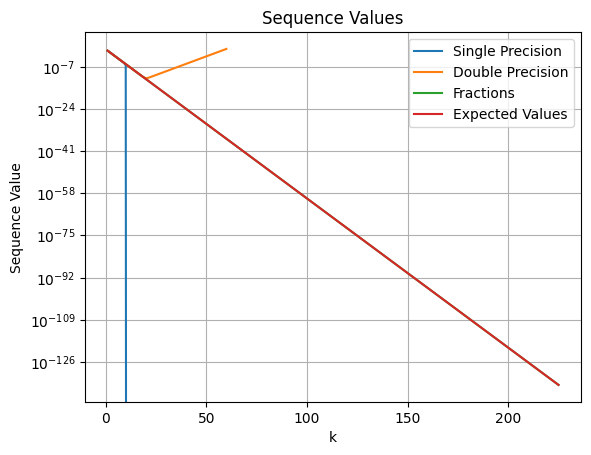

In [5]:
plt.semilogy(np.arange(1, n_single+1), x_single, label='Single Precision')
plt.semilogy(np.arange(1, n_double+1), x_double, label='Double Precision')
plt.semilogy(np.arange(1, n_fraction+1), x_fractions, label='Fractions')
plt.semilogy(np.arange(1, n_fraction+1), x_expected, label='Expected Values')
plt.title('Sequence Values')
plt.xlabel('k')
plt.ylabel('Sequence Value')
plt.legend()
plt.grid(True)
plt.show()

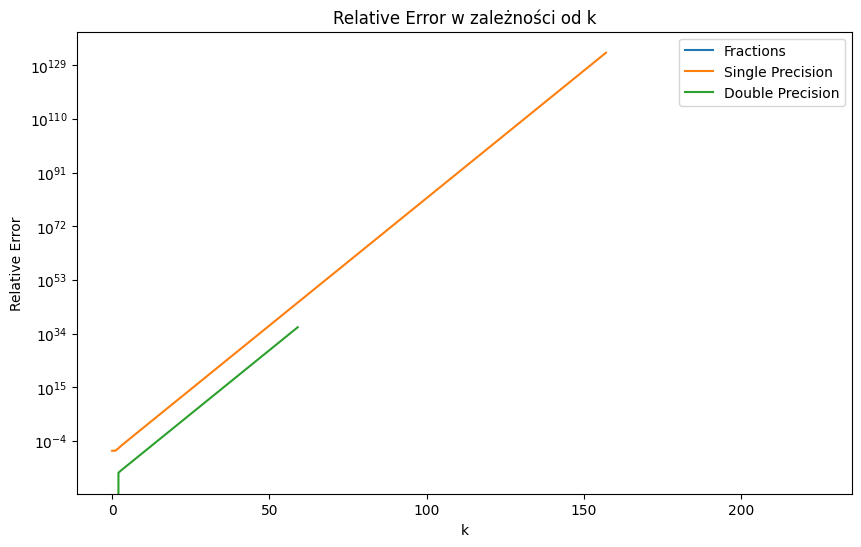

In [6]:
plt.figure(figsize=(10, 6))
plt.semilogy(range(n_fraction), error_fractions, label='Fractions')
plt.semilogy(range(n_single), error_single, label='Single Precision')
plt.semilogy(range(n_double), error_double, label='Double Precision')
plt.xlabel('k')
plt.ylabel('Relative Error')
plt.title('Relative Error w zależności od k')
plt.legend()
plt.show()